**EPICURIOUS: RECIPES WITH RATING AND NUTRITION DATASET <BR>**
# **CLASSIFYING HOLIDAY-RELATED FOOD AND NON-HOLIDAY FOOD <br>**
**(DROPPING VALUE-MISSING ROWS METHOD)** <BR>

**CHANGE WORKING DIRECTORY**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/recipe_nutrition

/content/drive/MyDrive/Colab Notebooks/recipe_nutrition


**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection       import train_test_split
from sklearn.preprocessing         import StandardScaler
from sklearn.preprocessing         import RobustScaler
from sklearn.preprocessing         import QuantileTransformer
from sklearn.preprocessing         import PowerTransformer
from sklearn.preprocessing         import MinMaxScaler
from sklearn.preprocessing         import MaxAbsScaler
from sklearn.pipeline              import Pipeline
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.svm                   import SVC
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.naive_bayes           import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model          import LogisticRegression
from sklearn.metrics               import mean_squared_error
from sklearn.model_selection       import cross_val_score

**COMBINE COLUMNS INTO HOLIDAY COLUMN AND SAVE NEW DATASET**

In [ ]:
data_old = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recipe_nutrition/epi.csv')

In [ ]:
selected_features = pd.read_csv('selected_features.txt',header=None).values.flatten().tolist()

In [ ]:
holiday = [1.0 if data_old[selected_features].iloc[i,:].any() else 0.0 for i in range(data_old.shape[0])]

In [ ]:
data_old = data_old.drop(columns=selected_features)

In [ ]:
data_old['holiday'] = holiday

In [ ]:
data_old.shape

(20052, 634)

In [ ]:
data_old.to_csv('epi_new.csv',index=False)

**INSIGHTS**

In [ ]:
top_recipes = pd.DataFrame({'recipe':data_old.iloc[:,0].values, 'frequency': data_old.iloc[:,6:].sum(axis=1).values}).sort_values(by='frequency',ascending=False).head(10)

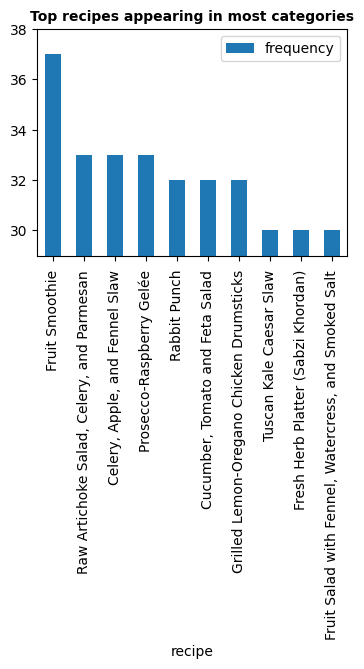

In [ ]:
top_recipes.plot.bar(x ='recipe', ylim=[29,38], figsize=(4,3))
plt.title('Top recipes appearing in most categories',weight='bold', size = 10)
plt.show()

In [ ]:
data_old.columns[6:]

Index(['#cakeweek', '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries', 'advance prep required', 'alabama', 'alaska',
       'alcoholic', 'almond',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=674)

In [ ]:
top_features = pd.DataFrame({'feature':data_old.columns[6:], 'frequency': data_old.iloc[:,6:].sum().values}).sort_values(by='frequency',ascending=False).head(10)

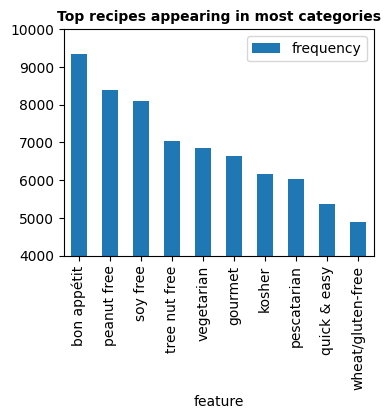

In [ ]:
top_features.plot.bar(x ='feature', ylim=[4000,10000], figsize=(4,3))
plt.title('Top recipes appearing in most categories',weight='bold', size = 10)
plt.show()

**LOAD NEW DATASET**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recipe_nutrition/epi_new.csv')

**PREPROCESSING**

In [ ]:
data = data.dropna()

In [ ]:
data = data.drop(columns=['title', 'rating'])

In [ ]:
data[data['holiday']==1].iloc[0,:]

calories       403.0
protein         18.0
fat             23.0
sodium        1439.0
#wasteless       0.0
               ...  
leftovers        0.0
snack            0.0
snack week       0.0
turkey           0.0
holiday          1.0
Name: 1, Length: 632, dtype: float64

**FIND BEST CORRELATED ATTRIBUTES**

In [ ]:
corr = data.corr()['holiday']

In [ ]:
corr = pd.DataFrame(corr)
corr['abs'] = abs(corr.values)

In [ ]:
top_corr = corr.dropna().sort_values(by='abs',ascending=False)['holiday'].iloc[1:13]

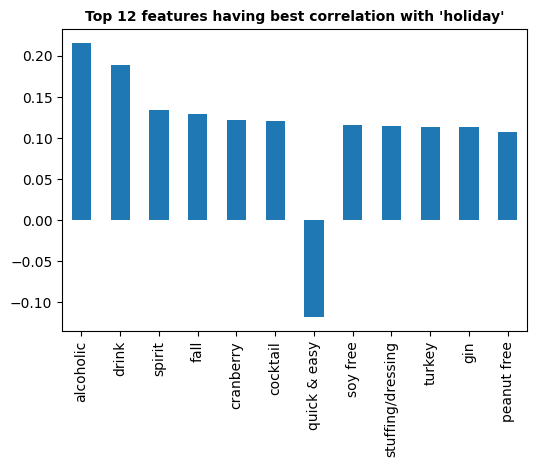

In [ ]:
plt.figure(dpi=100)
top_corr.plot.bar(title='Top 12 features having best correlation with \'holiday\'')
plt.title('Top 12 features having best correlation with \'holiday\'', weight = 'bold', size = 10)
plt.show()

**SPLIT DATASET INTO TRAIN AND TEST SET**

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

**TRAINING**

In [ ]:
!mkdir Linh_workspace/models

In [ ]:
scalers = [['standard',StandardScaler()],
           ['robust',RobustScaler()],
           ['quantile',QuantileTransformer()],
           ['power',PowerTransformer()],
           ['minmax',MinMaxScaler()],
           ['maxabs',MaxAbsScaler()]]
models =  [['KNN',KNeighborsClassifier()],
           ['SVC',SVC()],
           ['DT',DecisionTreeClassifier()],
           ['RF',RandomForestClassifier()],
           ['GNB',GaussianNB()],
           ['LDA',LinearDiscriminantAnalysis()],
           ['LR',LogisticRegression()]]

In [ ]:
for model in models:
  for scaler in scalers:
    name = model[0]+'_'+scaler[0]
    print(name)
    pipe = Pipeline([('scaler', scaler[1]), ('model', model[1])], verbose=True)
    pipe.fit(X_train, y_train)
    joblib.dump(pipe,'Linh_workspace/models/'+name+'.pkl')

KNN_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.1s
KNN_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.3s
KNN_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.6s
KNN_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  16.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.0s
KNN_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.4s
KNN_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.6s
SVC_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.6min
SVC_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.0min
SVC_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.9s
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.4min
SVC_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  14.8s
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.5min
SVC_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.5min
SVC_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total= 2.5min
DT_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.2s
DT_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.2s
DT_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.8s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.2s
DT_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  15.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.2s
DT_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.2s
DT_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.2s
RF_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   7.4s
RF_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   7.2s
RF_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=   7.2s
RF_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  14.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=   7.0s
RF_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   7.1s
RF_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   7.0s
GNB_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
GNB_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
GNB_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.8s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
GNB_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  15.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
GNB_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
GNB_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
LDA_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.8s
LDA_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.7s
LDA_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.6s
LDA_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  14.7s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.7s
LDA_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.7s
LDA_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.7s
LR_standard
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   1.5s
LR_robust
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.3s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   2.3s
LR_quantile
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.9s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   1.5s
LR_power


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[Pipeline] ............ (step 1 of 2) Processing scaler, total=  14.7s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.5s
LR_minmax
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Pipeline] ............. (step 2 of 2) Processing model, total=   1.7s
LR_maxabs
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.5s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**VALIDATING**

In [ ]:
model_detail = []
for model in models:
  for scaler in scalers:
    name = model[0]+'_'+scaler[0]
    print(name)
    pipe = joblib.load('Linh_workspace/models/'+name+'.pkl')
    cv4 = cross_val_score(pipe[-1],X_test,y_test,cv=4)
    cv5 = cross_val_score(pipe[-1],X_test,y_test,cv=5)
    model_detail.append([name, pipe.score(X_test,y_test), str(round(cv4.mean(),2))+u'\u00B1'+str(round(cv4.std(),2)), str(round(cv5.mean(),2))+u'\u00B1'+str(round(cv5.std(),2))])

KNN_standard
KNN_robust
KNN_quantile
KNN_power
KNN_minmax
KNN_maxabs
SVC_standard
SVC_robust
SVC_quantile
SVC_power
SVC_minmax
SVC_maxabs
DT_standard
DT_robust
DT_quantile
DT_power
DT_minmax
DT_maxabs
RF_standard
RF_robust
RF_quantile
RF_power
RF_minmax
RF_maxabs
GNB_standard
GNB_robust
GNB_quantile
GNB_power
GNB_minmax
GNB_maxabs
LDA_standard
LDA_robust
LDA_quantile
LDA_power
LDA_minmax
LDA_maxabs
LR_standard


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_robust


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_quantile


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_power


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_minmax


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR_maxabs


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
scalers = ['StandardScaler',
           'RobustScaler',
           'QuantileTransformer',
           'PowerTransformer',
           'MinMaxScaler',
           'MaxAbsScaler']
models =  ['KNeighborsClassifier',
           'SVC',
           'DecisionTreeClassifier',
           'RandomForestClassifier',
           'GaussianNB',
           'LinearDiscriminantAnalysis',
           'LogisticRegression']

In [ ]:
results = pd.DataFrame(model_detail,columns=['Model name', 'Accuracy', '4-fold validation', '5-fold validation'])

In [ ]:
results['Model used'] = [model for model in models for i in range(len(scalers))]

In [ ]:
results['Normalization method'] = [scaler for i in range(len(models)) for scaler in scalers]

In [ ]:
temp = pd.read_csv('/content/time_output.txt',header=None)
results['Training time (s)'] = [round(temp.iloc[2*i,0]+temp.iloc[2*i+1,0],1) for i in range(len(models)*len(scalers))]

In [ ]:
results = results.iloc[:,[0,-3,-2,-1,1,2,3]]

In [ ]:
results.sort_values(by='Accuracy',ascending=False).iloc[:20,:]

,Model name,Model used,Normalization method,Training time (s),Accuracy,4-fold validation,5-fold validation
19,RF_robust,RandomForestClassifier,RobustScaler,7.5,0.956823,0.74±0.0,0.74±0.01
18,RF_standard,RandomForestClassifier,StandardScaler,7.6,0.955247,0.75±0.0,0.75±0.01
22,RF_minmax,RandomForestClassifier,MinMaxScaler,7.2,0.954932,0.75±0.0,0.75±0.01
20,RF_quantile,RandomForestClassifier,QuantileTransformer,8.1,0.954617,0.74±0.0,0.75±0.01
21,RF_power,RandomForestClassifier,PowerTransformer,21.9,0.954302,0.75±0.01,0.75±0.01
23,RF_maxabs,RandomForestClassifier,MaxAbsScaler,7.1,0.953987,0.75±0.01,0.75±0.01
15,DT_power,DecisionTreeClassifier,PowerTransformer,16.5,0.951781,0.66±0.02,0.67±0.02
14,DT_quantile,DecisionTreeClassifier,QuantileTransformer,2.0,0.951150,0.67±0.02,0.66±0.02
12,DT_standard,DecisionTreeClassifier,StandardScaler,1.4,0.949259,0.66±0.01,0.67±0.02
13,DT_robust,DecisionTreeClassifier,RobustScaler,1.5,0.948944,0.66±0.01,0.66±0.01


**RANKINGS**

In [ ]:
plt.rcParams["figure.dpi"] = 100

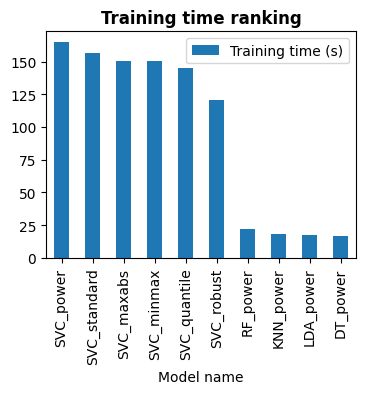

In [ ]:
results[['Model name','Training time (s)']].sort_values(by='Training time (s)',ascending=False).head(10).plot.bar(x='Model name', figsize=(4,3))
plt.title('Training time ranking',weight='bold', size = 12)
plt.show()

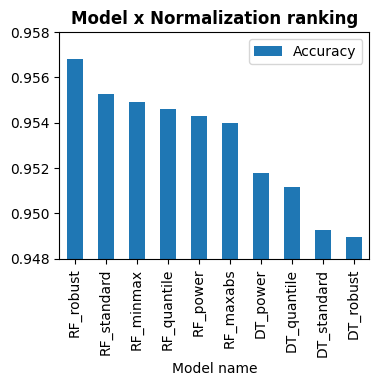

In [ ]:
results[['Model name','Accuracy']].sort_values(by='Accuracy',ascending=False).head(10).plot.bar(x='Model name', ylim =[0.948,0.958], figsize=(4,3))
plt.title('Model x Normalization ranking',weight='bold', size = 12)
plt.show()

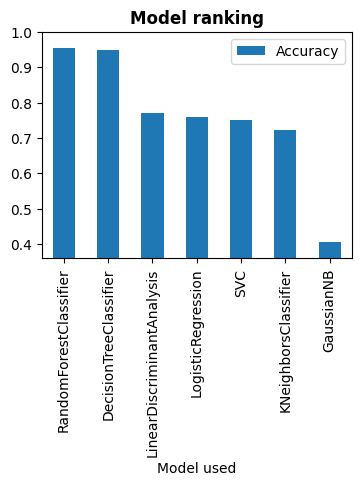

In [ ]:
results[['Model used','Accuracy']].groupby(['Model used']).mean().sort_values(by='Accuracy',ascending=False).plot.bar(figsize=(4,3), ylim=[0.36,1.0])
plt.title('Model ranking',weight='bold', size = 12)
plt.show()

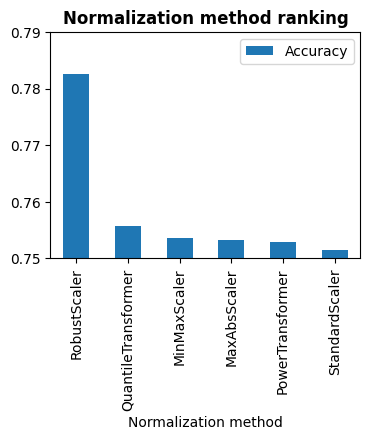

In [ ]:
results[['Normalization method','Accuracy']].groupby(['Normalization method']).mean().sort_values(by='Accuracy',ascending=False).plot.bar(figsize=(4,3), ylim=[0.75,0.79])
plt.title('Normalization method ranking',weight='bold', size = 12)
plt.show()